# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies

import os

import requests

import json

import pandas as pd

from dotenv import load_dotenv

import alpaca_trade_api as tradeapi

from MCForecastTools import MCSimulation

import datetime

%matplotlib inline


In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function

load_dotenv()


Python-dotenv could not parse statement starting at line 1


True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.

btc_coins = 1.2

eth_coins = 5.3


#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE

monthly_income  = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC

btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

print(json.dumps(btc_response, indent=8, sort_keys=True))


{
        "data": {
                "1": {
                        "circulating_supply": 18618362,
                        "id": 1,
                        "last_updated": 1612377484,
                        "max_supply": 21000000,
                        "name": "Bitcoin",
                        "quotes": {
                                "USD": {
                                        "market_cap": 688747431808,
                                        "percent_change_1h": 0.0372739061724231,
                                        "percent_change_24h": 6.09003681251477,
                                        "percent_change_7d": 13.6461812543511,
                                        "percentage_change_1h": 0.0372739061724231,
                                        "percentage_change_24h": 6.09003681251477,
                                        "percentage_change_7d": 13.6461812543511,
                                        "price": 37028.0,
                                 

In [7]:
# Using the Python requests library, make an API call to access the current price ETH

eth_response = requests.get(eth_url).json()

# YOUR CODE HERE

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent=8, sort_keys=True))


{
        "data": {
                "1027": {
                        "circulating_supply": 114521841,
                        "id": 1027,
                        "last_updated": 1612377537,
                        "max_supply": 0,
                        "name": "Ethereum",
                        "quotes": {
                                "USD": {
                                        "market_cap": 187392677777,
                                        "percent_change_1h": 0.638047476947117,
                                        "percent_change_24h": 10.6486370039471,
                                        "percent_change_7d": 20.778100378237,
                                        "percentage_change_1h": 0.638047476947117,
                                        "percentage_change_24h": 10.6486370039471,
                                        "percentage_change_7d": 20.778100378237,
                                        "price": 1636.83,
                                    

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC

btc_price = btc_response['data']['1']["quotes"]["USD"]["price"]

# YOUR CODE HERE

# Print the current price of BTC
# YOUR CODE HERE
print(f"The price for Bitcoin is ${btc_price}")


The price for Bitcoin is $37028.0


In [9]:
# Navigate the ETH response object to access the current price of ETH

eth_price = eth_response['data']['1027']["quotes"]["USD"]["price"]

# Print the current price of ETH
# YOUR CODE HERE
print(f"The price for Bitcoin is ${eth_price}")


The price for Bitcoin is $1636.83


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [57]:
# Establishing cryptocurrency holdings

btc_coins = 0.25

eth_coins = 5.3


In [11]:
# Compute the current value of the BTC holding

btc_value = btc_price * btc_coins


# Print current value of your holding in BTC

print(f"The total value for your Bitcoin is ${btc_value:.2f}")


The total value for your Bitcoin is $9257.00


In [12]:
# Compute the current value of the ETH holding 

eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
# YOUR CODE HERE

print(f"The total value for your Ethereum is ${eth_value:.2f}")


The total value for your Ethereum is $8675.20


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding

total_crypto_wallet = btc_value + eth_value


total_crypto_wallet


17932.199

In [14]:
# Print current cryptocurrency wallet balance
# YOUR CODE HERE

print(f"The total value for your cryptocurrency wallet is ${total_crypto_wallet:.2f}")


The total value for your cryptocurrency wallet is $17932.20


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [15]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110

agg_shares = 200


In [58]:
# Creating datime objects for todays date and one year from that date

today_date = str(datetime.datetime.now()).split()[0]

one_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=1*365)).split()[0]


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [17]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE

alpaca_api_key = os.getenv("ALPACA_API_KEY")

alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [18]:
# Printing API key type to confirm key upload

print(f"Alpaca Key type: {type(alpaca_api_key)}")

print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [19]:
# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [20]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ["SPY",  "AGG"]
# Set timeframe to 1D 
# YOUR CODE HERE
timeframe = '1D'
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE

start_date = pd.Timestamp(one_year_ago , tz="America/New_York").isoformat()
end_date = pd.Timestamp(today_date, tz="America/New_York").isoformat()

In [21]:
# Start day set to prior weekday

start_date


'2020-02-04T00:00:00-05:00'

In [22]:
# End day set to prior weekday

end_date


'2021-02-03T00:00:00-05:00'

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [23]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE

portfolio_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the resulting `portfolio_prices_df` DataFrame. 

portfolio_prices_df.head()


AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2020-02-04 00:00:00-05:00  114.10  114.10  113.8880  114.00  3260230  328.07   
2020-02-05 00:00:00-05:00  113.82  113.87  113.7601  113.79  4378692  332.27   
2020-02-06 00:00:00-05:00  113.82  113.93  113.7700  113.88  4489403  333.91   
2020-02-07 00:00:00-05:00  114.20  114.28  114.1000  114.22  3568443  332.82   
2020-02-10 00:00:00-05:00  114.44  114.44  114.2900  114.35  4161248  331.23   

                                                               
                               high     low   close    volume  
time                                                           
2020-02-04 00:00:00-05:00  330.0100  327.72  329.08  52512833  
2020-02-05 00:00:00-05:00  333.0900  330.67  332.82  52702659  
2020-02-06 00:00:00-05:00  334.1900  332.80  333.96  42644695  
2020-02-07 00:00:00-05:00  333.9941  331.60  332.20  51735741  
2020-02-10 00:00:00-05:00  334.7200  331.19  334.69  34150738

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [24]:
# Be sure to set the values from the DataFrame to a float by calling the float function 

spy_price = (portfolio_prices_df["SPY"]["close"])

agg_price = (portfolio_prices_df["AGG"]["close"])


In [25]:
#Reviewing Object Type

type(spy_price)


pandas.core.series.Series

In [26]:
#Reviewing Object Type

type(agg_price)


pandas.core.series.Series

In [27]:
# Reviewing series

display(agg_price)


time
2020-02-04 00:00:00-05:00    114.00
2020-02-05 00:00:00-05:00    113.79
2020-02-06 00:00:00-05:00    113.88
2020-02-07 00:00:00-05:00    114.22
2020-02-10 00:00:00-05:00    114.35
                              ...  
2021-01-28 00:00:00-05:00    117.43
2021-01-29 00:00:00-05:00    117.32
2021-02-01 00:00:00-05:00    117.21
2021-02-02 00:00:00-05:00    117.05
2021-02-03 00:00:00-05:00    116.93
Name: close, Length: 253, dtype: float64

In [28]:
# Reviewing series

display(spy_price)


time
2020-02-04 00:00:00-05:00    329.08
2020-02-05 00:00:00-05:00    332.82
2020-02-06 00:00:00-05:00    333.96
2020-02-07 00:00:00-05:00    332.20
2020-02-10 00:00:00-05:00    334.69
                              ...  
2021-01-28 00:00:00-05:00    377.60
2021-01-29 00:00:00-05:00    370.19
2021-02-01 00:00:00-05:00    376.18
2021-02-02 00:00:00-05:00    381.54
2021-02-03 00:00:00-05:00    383.27
Name: close, Length: 253, dtype: float64

In [29]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

agg_close_price = float(agg_price['2021-01-29'])


In [30]:
# Print the AGG closing price
# YOUR CODE HERE

agg_close_price


117.32

In [31]:
# Confirming value change

type(agg_close_price)


float

In [32]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

spy_close_price = float(spy_price['2021-01-29'])


In [33]:
# print the SPY closing price
# YOUR CODE HERE

spy_close_price


370.19

In [34]:
# confirming value change

type(spy_close_price)


float

In [35]:
# number of SPY shares

spy_shares = 110


In [36]:
# number of AGG shares


agg_shares = 200


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [37]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
# YOUR CODE HERE

print(f"The current value of your bond portfolios ${agg_value:.2f}")


The current value of your bond portfolios $23464.00


In [38]:
# Calculate the current value of the stock portion of the portfolio

spy_value = spy_shares * spy_close_price

spy_value


40720.9

In [39]:
# Print the current value of the stock portfolio
# YOUR CODE HERE

print(f"The current value of your stock portfolios ${spy_value:.2f}")


The current value of your stock portfolios $40720.90


In [40]:
# Calculate the total value of the stock and bond portion of the portfolio

total_stocks_bonds = agg_value + spy_value

total_stocks_bonds


64184.9

In [41]:
# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE

print(f"The current value of your securities ${total_stocks_bonds:.2f}")


The current value of your securities $64184.90


In [42]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds

total_portfolio = total_stocks_bonds + total_crypto_wallet

total_portfolio


82117.099

In [43]:
# Print current cryptocurrency wallet balance
# YOUR CODE HERE

print(f"The current value of your total detailed assests is  ${total_portfolio:.2f}")


The current value of your total detailed assests is  $82117.10


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [44]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE

savings_data = [total_crypto_wallet , total_stocks_bonds]

# Review the Python list savings_data
# YOUR CODE HERE

savings_data 


[17932.199, 64184.9]

In [45]:
# Reviewing new list object type

type(savings_data)


list

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [46]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE

savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto','stock/bond'])

# Display the savings_df DataFrame
# YOUR CODE HERE

savings_df


,amount
crypto,17932.199
stock/bond,64184.900


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Total value for (crypto and stock/bond)'}, ylabel='amount'>

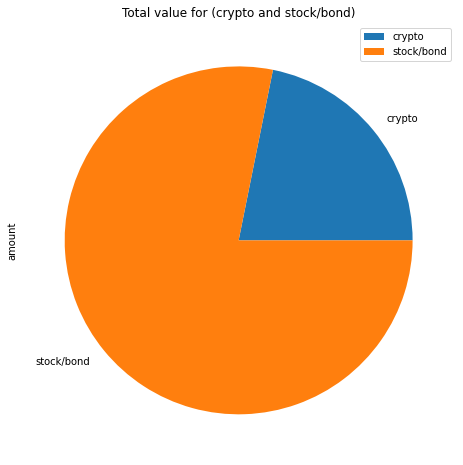

In [74]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE

savings_df.plot.pie(y ='amount', figsize=(16,8), title=('Total value for (crypto and stock/bond)'))


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [48]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE

emergency_fund_value = monthly_income * 5

In [49]:
# Checking emergency_fund_value

emergency_fund_value



60000

In [50]:
# Comparing values from If Statements

emergency_fund_value - total_portfolio


-22117.099000000002

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [51]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if total_portfolio > emergency_fund_value:
    
    print(" Congratulations you are well passed your set goal for your Emergency Fund. Way to Compound!. ")

elif total_portfolio == emergency_fund_value:
    
    print(" Congratulations on reaching this important financial goal. ")
    
elif total_portfolio < emergency_fund_value:
    
        print(f" We are ${emergency_fund_value:.2f} away from reaching your set goal for an Emergency Fund.")
        

 Congratulations you are well passed your set goal for your Emergency Fund. Way to Compound!. 


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [52]:
# Creating variable for ten year window

ten_year_hist = str(datetime.datetime.now() - datetime.timedelta(days=10*365)).split()[0]

ten_year_hist


'2011-02-06'

In [53]:
# Set start and end dates of 10 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 10 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE

In [54]:
# Confirming the start of our API call

ten_year_hist_time = pd.Timestamp(ten_year_hist , tz="America/New_York").isoformat()

ten_year_hist_time


'2011-02-06T00:00:00-05:00'

In [55]:
# Confirming the end of our API call


end_date_ten_year = pd.Timestamp(today_date, tz="America/New_York").isoformat()

end_date_ten_year


'2021-02-03T00:00:00-05:00'

In [76]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE

tenyear_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = ten_year_hist_time,
    end = end_date_ten_year
).df



# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE

display(tenyear_prices_df.head())

display(tenyear_prices_df.tail())


AGG                                       \
                             open     high       low   close    volume   
time                                                                     
2011-02-07 00:00:00-05:00  104.17  104.331  104.1100  104.29  569006.0   
2011-02-08 00:00:00-05:00  104.31  104.320  103.9100  103.99  692756.0   
2011-02-09 00:00:00-05:00  104.04  104.320  103.9301  104.19  484644.0   
2011-02-10 00:00:00-05:00  104.11  104.170  103.8500  103.89  485735.0   
2011-02-11 00:00:00-05:00  104.31  104.360  104.0700  104.30  746362.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2011-02-07 00:00:00-05:00  131.44  132.40  131.43  131.98   90480160  
2011-02-08 00:00:00-05:00  132.10  132.64  131.73  132.59   85774423  
2011-02-09 00:00:00-05:00  132.21  132.63  131.61  132.27  121763230  
2011-02-10 00:00:00-05:00  131.60  132.47  131.30  132.33  140547328  
2011-02-11 00:00:00-05:00  131.80  133.28  131.77  133.11  113377378

AGG                                       \
                               open    high       low   close     volume   
time                                                                       
2021-01-28 00:00:00-05:00  117.4800  117.49  117.2900  117.43  4440895.0   
2021-01-29 00:00:00-05:00  117.1563  117.40  116.5625  117.32  7119889.0   
2021-02-01 00:00:00-05:00  117.2000  117.26  117.0915  117.21  5469814.0   
2021-02-02 00:00:00-05:00  116.9900  117.09  116.9700  117.05  4694446.0   
2021-02-03 00:00:00-05:00  116.9700  116.99  116.8700  116.93  3482726.0   

                               SPY                                          
                              open     high       low     close     volume  
time                                                                        
2021-01-28 00:00:00-05:00  376.360  381.930  375.8900  377.6000   75229306  
2021-01-29 00:00:00-05:00  375.630  376.670  368.2700  370.1900  106397082  
2021-02-01 00:00:00-05:00  373.720  377.340  370.3760  376.1800   64056510  
2021-02-02 00:00:00-05:00  379.650  383.220  376.3181  381.5400   53979346  
2021-02-03 00:00:00-05:00  382.435  383.365  380.4800  383.3098   26779218

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [78]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Create a simulation object

third_year_simulation = MCSimulation(
    portfolio_data=tenyear_prices_df,
    weights=[0.40, 0.60],
    num_simulation=500,
    num_trading_days=252 * 30,
)


# Review the simulation input data
# YOUR CODE HERE
third_year_simulation.portfolio_data.head()


AGG                                       \
                             open     high       low   close    volume   
time                                                                     
2011-02-07 00:00:00-05:00  104.17  104.331  104.1100  104.29  569006.0   
2011-02-08 00:00:00-05:00  104.31  104.320  103.9100  103.99  692756.0   
2011-02-09 00:00:00-05:00  104.04  104.320  103.9301  104.19  484644.0   
2011-02-10 00:00:00-05:00  104.11  104.170  103.8500  103.89  485735.0   
2011-02-11 00:00:00-05:00  104.31  104.360  104.0700  104.30  746362.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2011-02-07 00:00:00-05:00          NaN  131.44  132.40  131.43  131.98   
2011-02-08 00:00:00-05:00    -0.002877  132.10  132.64  131.73  132.59   
2011-02-09 00:00:00-05:00     0.001923  132.21  132.63  131.61  132.27   
2011-02-10 00:00:00-05:00    -0.002879  131.60  132.47  131.30  132.33   
2011-02-11 00:00:00-05:00     0.003946  131.80  133.28  131.77  133.11   

                                                   
                              volume daily_return  
time                                               
2011-02-07 00:00:00-05:00   90480160          NaN  
2011-02-08 00:00:00-05:00   85774423     0.004622  
2011-02-09 00:00:00-05:00  121763230    -0.002413  
2011-02-10 00:00:00-05:00  140547328     0.000454  
2011-02-11 00:00:00-05:00  113377378     0.005894

In [79]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE

third_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998273,1.003270,0.999067,0.990002,0.991816,0.996047,1.004635,0.999567,1.003509,0.998238,...,1.005801,1.000671,1.013062,1.002318,0.993961,0.996834,0.999561,1.003187,0.999924,1.007584
2,1.001851,1.005351,1.002018,0.992017,0.995705,0.995662,1.005025,1.002060,0.999591,0.993498,...,1.009507,1.002894,1.002086,1.000717,0.995516,1.002236,1.003973,1.007761,0.994996,1.007966
3,1.006609,1.002600,1.013436,0.996378,0.994093,1.000448,0.998353,0.996076,0.994655,0.992428,...,1.011526,0.996609,1.000074,1.010622,0.996889,0.989923,1.002346,1.007799,0.997400,0.986207
4,1.001794,0.995362,1.018613,1.007416,0.995363,0.997564,0.994382,1.001832,0.984288,0.994546,...,1.004632,1.005505,1.011101,1.020717,0.995734,0.995878,1.003498,1.001603,1.004748,0.993868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.445383,18.428199,13.030478,8.563210,29.383470,7.764250,7.351240,9.297030,5.858677,3.643807,...,10.048427,8.051203,4.706285,12.293045,15.449610,6.503947,3.052154,7.540516,9.764262,9.937313
7557,12.440454,18.542457,12.944280,8.549182,29.466111,7.850771,7.373953,9.306190,5.831818,3.650359,...,10.113962,8.065921,4.737351,12.227443,15.447593,6.498998,3.044858,7.583955,9.790783,9.873839
7558,12.385463,18.554295,12.910364,8.484580,29.663491,7.895738,7.435357,9.199690,5.881498,3.651051,...,10.217552,8.178330,4.752297,12.339320,15.421143,6.464281,3.097043,7.576797,9.767571,9.830958
7559,12.559351,18.695928,12.882570,8.466437,29.658872,7.905533,7.355712,9.199630,5.816882,3.616104,...,10.251999,8.243498,4.698746,12.421356,15.325912,6.468248,3.091446,7.573457,9.813340,9.798749


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

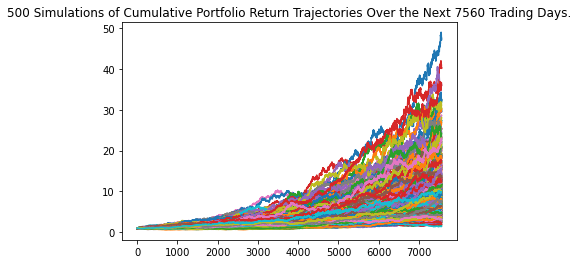

In [82]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

third_year_simulation.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

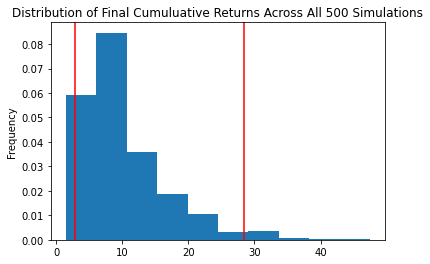

In [83]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

third_year_simulation.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [84]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

work_stats = third_year_simulation.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

print(work_stats)


count           500.000000
mean             10.158699
std               6.482557
min               1.441202
25%               5.799162
50%               8.490918
75%              12.531762
max              47.517022
95% CI Lower      2.765669
95% CI Upper     28.358699
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [85]:
# The current value of your stock portfolio

print(f"The current value of your stock portfolio ${spy_value:.2f}")


The current value of your stock portfolio $40720.90


In [86]:
# The current value of your bond portfolio

print(f"The current value of your bond portfolios ${agg_value:.2f}")


The current value of your bond portfolios $23464.00


In [87]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

ci_lower_thirty_cumulative_return = work_stats[8]*total_portfolio

ci_upper_thirty_cumulative_return = work_stats[9]*total_portfolio

# Print the result of your calculations
# YOUR CODE HERE
# Print results

print(f"There is a 95% chance that an initial investment of ${total_portfolio:.2f} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")


There is a 95% chance that an initial investment of $82117.10 in the portfolio over the next year will end within in the range of $227,108.75 and $2,328,734.09.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [88]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

ten_year_simulation = MCSimulation(
    portfolio_data=tenyear_prices_df,
    weights=[0.20, 0.80],
    num_simulation=500,
    num_trading_days=252 * 10,
)


# Review the simulation input data
# YOUR CODE HERE

ten_year_simulation.portfolio_data.head()


AGG                                       \
                             open     high       low   close    volume   
time                                                                     
2011-02-07 00:00:00-05:00  104.17  104.331  104.1100  104.29  569006.0   
2011-02-08 00:00:00-05:00  104.31  104.320  103.9100  103.99  692756.0   
2011-02-09 00:00:00-05:00  104.04  104.320  103.9301  104.19  484644.0   
2011-02-10 00:00:00-05:00  104.11  104.170  103.8500  103.89  485735.0   
2011-02-11 00:00:00-05:00  104.31  104.360  104.0700  104.30  746362.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2011-02-07 00:00:00-05:00          NaN  131.44  132.40  131.43  131.98   
2011-02-08 00:00:00-05:00    -0.002877  132.10  132.64  131.73  132.59   
2011-02-09 00:00:00-05:00     0.001923  132.21  132.63  131.61  132.27   
2011-02-10 00:00:00-05:00    -0.002879  131.60  132.47  131.30  132.33   
2011-02-11 00:00:00-05:00     0.003946  131.80  133.28  131.77  133.11   

                                                   
                              volume daily_return  
time                                               
2011-02-07 00:00:00-05:00   90480160          NaN  
2011-02-08 00:00:00-05:00   85774423     0.004622  
2011-02-09 00:00:00-05:00  121763230    -0.002413  
2011-02-10 00:00:00-05:00  140547328     0.000454  
2011-02-11 00:00:00-05:00  113377378     0.005894

In [89]:
# Review the simulation input data
# YOUR CODE HERE

ten_year_simulation.portfolio_data.tail()


AGG                                       \
                               open    high       low   close     volume   
time                                                                       
2021-01-28 00:00:00-05:00  117.4800  117.49  117.2900  117.43  4440895.0   
2021-01-29 00:00:00-05:00  117.1563  117.40  116.5625  117.32  7119889.0   
2021-02-01 00:00:00-05:00  117.2000  117.26  117.0915  117.21  5469814.0   
2021-02-02 00:00:00-05:00  116.9900  117.09  116.9700  117.05  4694446.0   
2021-02-03 00:00:00-05:00  116.9700  116.99  116.8700  116.93  3482726.0   

                                            SPY                               \
                          daily_return     open     high       low     close   
time                                                                           
2021-01-28 00:00:00-05:00    -0.000766  376.360  381.930  375.8900  377.6000   
2021-01-29 00:00:00-05:00    -0.000937  375.630  376.670  368.2700  370.1900   
2021-02-01 00:00:00-05:00    -0.000938  373.720  377.340  370.3760  376.1800   
2021-02-02 00:00:00-05:00    -0.001365  379.650  383.220  376.3181  381.5400   
2021-02-03 00:00:00-05:00    -0.001025  382.435  383.365  380.4800  383.3098   

                                                   
                              volume daily_return  
time                                               
2021-01-28 00:00:00-05:00   75229306     0.008439  
2021-01-29 00:00:00-05:00  106397082    -0.019624  
2021-02-01 00:00:00-05:00   64056510     0.016181  
2021-02-02 00:00:00-05:00   53979346     0.014248  
2021-02-03 00:00:00-05:00   26779218     0.004639

In [90]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE

ten_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994955,0.998781,1.002038,0.987714,0.993301,1.003939,1.013900,0.990026,1.007748,1.020357,...,0.991538,0.993565,1.006284,1.008469,0.989322,1.002595,0.997800,0.983197,1.000936,1.004397
2,1.004571,1.003705,0.994982,0.996661,0.985406,1.023841,1.013153,0.990573,0.996940,1.027749,...,0.979246,0.969612,0.997977,1.006500,0.984833,1.008508,0.999348,0.980611,1.009450,1.007732
3,1.016103,1.003344,1.002019,0.990386,0.986257,1.031040,1.018054,0.977711,0.993184,1.035011,...,0.977214,0.978807,0.985591,1.020735,0.973704,1.007752,1.015972,0.982240,1.011046,1.013926
4,1.020164,1.001060,1.001540,0.994339,0.971639,1.021392,1.015571,0.988919,0.998857,1.035338,...,0.987865,0.973753,1.001842,1.019845,0.970714,1.025812,1.034261,0.973754,0.989889,1.005744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.684448,5.137567,2.191897,1.320530,1.806261,4.304003,4.466157,1.753601,2.070930,1.899915,...,3.146700,1.089526,3.333624,3.222455,3.297463,2.686921,2.043834,1.155778,1.384317,2.107477
2517,2.676429,5.053595,2.184064,1.334101,1.792028,4.273273,4.481649,1.747565,2.088103,1.912455,...,3.146371,1.107217,3.337853,3.240388,3.308198,2.707930,2.031620,1.154416,1.387893,2.130216
2518,2.667900,5.097011,2.161756,1.343454,1.804142,4.262003,4.500415,1.741364,2.104341,1.891167,...,3.131284,1.093217,3.322291,3.247111,3.281075,2.713354,2.044208,1.171289,1.387535,2.077887
2519,2.665242,5.129162,2.134483,1.353915,1.765599,4.275206,4.504875,1.746630,2.115645,1.912987,...,3.125478,1.097760,3.328575,3.299707,3.304481,2.735353,2.063161,1.176179,1.351795,2.083346


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

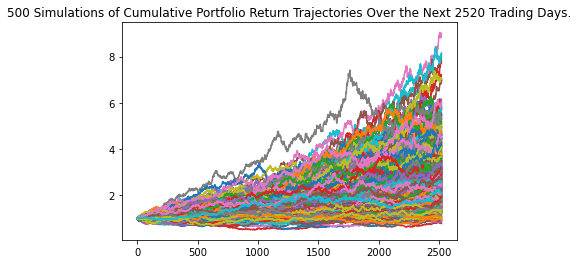

In [91]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

ten_year_simulation.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

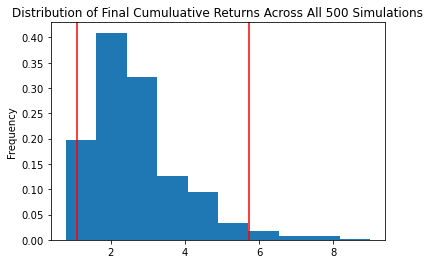

In [92]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

ten_year_simulation.plot_distribution()


In [93]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

come_back = ten_year_simulation.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
print(come_back)


count           500.000000
mean              2.691569
std               1.233020
min               0.783809
25%               1.820331
50%               2.441799
75%               3.215512
max               8.993531
95% CI Lower      1.079332
95% CI Upper      5.735333
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [94]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE

print(f"The current value of your bond portfolios ${agg_value:.2f}")

print(f"The current value of your stock portfolios ${spy_value:.2f}")


The current value of your bond portfolios $23464.00
The current value of your stock portfolios $40720.90


In [95]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = come_back[8]*total_portfolio

ci_upper_ten_cumulative_return = come_back[9]*total_portfolio

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that an initial investment of ${total_portfolio:.2f} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f}.")


There is a 95% chance that an initial investment of $82117.10 in the portfolio over the next year will end within in the range of $88,631.60 and $470,968.87.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?